In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras

In [14]:
# Softblending mit komplexen Zahlen verstehen

def soft_blending(clean, filmed, ones_t2c, mask):
    zw1 = tf.math.subtract(ones_t2c, mask)
    zw1 = tf.math.multiply(zw1, clean)

    zw2 = tf.multiply(mask, filmed)
    return tf.math.add(zw1, zw2)



one = 1 + 0j

clean = 10 + 10j
filmed = 0 + 0j

mask = 0+0j

processed = soft_blending(clean, filmed, one, mask)
processed


<tf.Tensor: shape=(), dtype=complex128, numpy=(10+10j)>

In [475]:
np.random.seed = 42
IMG_WIDTH = 500
IMG_HEIGHT = 500
IMG_CHANNELS = 3
f_size = 15


In [476]:
type(float(4))

float

In [477]:
a = np.zeros((10,10)).astype(np.float32)
zeros = tf.zeros((10))
ones = tf.ones((10))
a_t2c = tf.complex(a, ones)

# a_t2c


In [478]:
TRAIN_FILMED_PATH = "D:\\Main\\MA_PROGR\\Data\\Train\\UNet_Train\\model_at_tree_5_pics\\filmed"
TRAIN_CLEAN_PATH = "D:\\Main\\MA_PROGR\\Data\\Train\\UNet_Train\\model_at_tree_5_pics\\clean_aligned"


In [479]:
train_filmed_imgs = []
train_clean_imgs = []


In [480]:
OFFSET = 400

for addr_filmed in os.listdir(TRAIN_FILMED_PATH):
    img = cv2.imread(f"{TRAIN_FILMED_PATH}\{addr_filmed}", cv2.IMREAD_GRAYSCALE)
    train_filmed_imgs.append(
        img[OFFSET:IMG_WIDTH+OFFSET, OFFSET:IMG_HEIGHT+OFFSET])

for addr_clean in os.listdir(TRAIN_CLEAN_PATH):
    img = cv2.imread(f"{TRAIN_CLEAN_PATH}\{addr_clean}", cv2.IMREAD_GRAYSCALE)
    train_clean_imgs.append(
        img[OFFSET:IMG_WIDTH+OFFSET, OFFSET:IMG_HEIGHT+OFFSET])


In [481]:
img_filmed = train_filmed_imgs[0]
img_clean = train_clean_imgs[0]

In [482]:
#  img = img[:, :, 0]

In [483]:
def f2pd(fourier_array):
    # transoforms an fourier image into pixel domain in order
    # to display it
    return (np.log(abs(fourier_array)))

In [484]:
my_complex = 0+0j


print(abs(my_complex))
print(np.log(abs(my_complex)))

0.0
-inf


C:\Users\Steffen\AppData\Local\Temp\ipykernel_8100\2266317585.py:5: RuntimeWarning: divide by zero encountered in log
  print(np.log(abs(my_complex)))


In [485]:
mask = tf.complex(ones, zeros)
mask = tf.multiply(mask, 1)
mask


<tf.Tensor: shape=(10,), dtype=complex64, numpy=
array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j], dtype=complex64)>

In [496]:
img_filmed


array([[118, 255, 248, ...,  29,  84, 136],
       [ 85, 165, 174, ...,  68, 126, 227],
       [ 16,  50,  59, ...,  77, 190, 255],
       ...,
       [162, 179, 112, ...,   3,  28,  26],
       [255, 227, 213, ...,   1,  69,  56],
       [182, 102, 170, ...,   6,  16,  18]], dtype=uint8)

tf.Tensor(
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]], shape=(500, 500), dtype=bool)


Text(0.5, 1.0, 'Zurück zu normal')

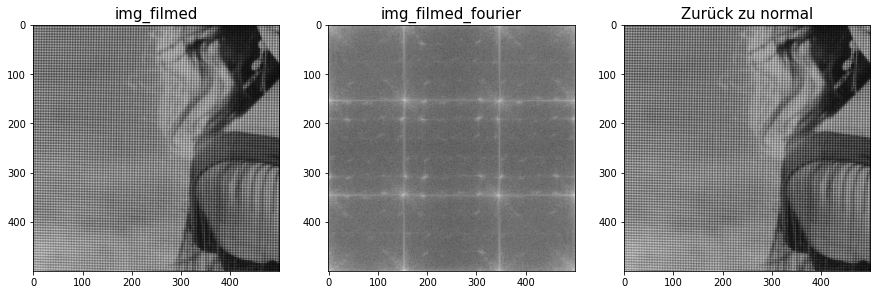

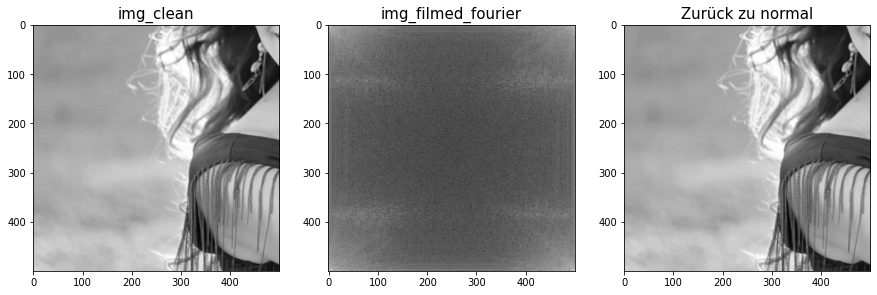

In [486]:
def tf_inv_fourier_trans(img):
    # return tf.math.round(tf.math.real(tf.signal.ifft2d(img)))
    return tf.math.real(tf.signal.ifft2d(img))

img_filmed_fourier = tf.signal.fft2d(img_filmed)
img_clean_fourier = tf.signal.fft2d(img_clean)
# print(img_filmed)
filmed_fourier_2_px = tf_inv_fourier_trans(img_filmed_fourier)
clean_fourier_2_px = tf_inv_fourier_trans(img_clean_fourier)

# print(img_filmed[0][:5])
# print(reversed_img[0][:5])

print(img_clean == clean_fourier_2_px)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow((img_filmed), cmap = 'gray')
ax[0].set_title('img_filmed', fontsize=f_size)
ax[1].imshow(f2pd(img_filmed_fourier), cmap='gray')
ax[1].set_title('img_filmed_fourier', fontsize=f_size)
ax[2].imshow(filmed_fourier_2_px,
             cmap='gray')
ax[2].set_title('Zurück zu normal',
                fontsize=f_size)




abs(tf.signal.ifft2d(img_filmed_fourier))
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow((img_clean), cmap = 'gray')
ax[0].set_title('img_clean', fontsize=f_size)
ax[1].imshow(f2pd(img_clean_fourier), cmap='gray')
ax[1].set_title('img_filmed_fourier', fontsize=f_size)
ax[2].imshow(clean_fourier_2_px,
             cmap='gray')
ax[2].set_title('Zurück zu normal',
                fontsize=f_size)


tf.Tensor(
[[0.2+0.j 0.2+0.j 0.2+0.j ... 0.2+0.j 0.2+0.j 0.2+0.j]
 [0.2+0.j 0.2+0.j 0.2+0.j ... 0.2+0.j 0.2+0.j 0.2+0.j]
 [0.2+0.j 0.2+0.j 0.2+0.j ... 0.2+0.j 0.2+0.j 0.2+0.j]
 ...
 [0.2+0.j 0.2+0.j 0.2+0.j ... 0.2+0.j 0.2+0.j 0.2+0.j]
 [0.2+0.j 0.2+0.j 0.2+0.j ... 0.2+0.j 0.2+0.j 0.2+0.j]
 [0.2+0.j 0.2+0.j 0.2+0.j ... 0.2+0.j 0.2+0.j 0.2+0.j]], shape=(500, 500), dtype=complex64)


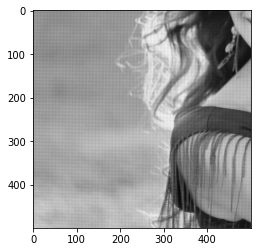

In [494]:
def soft_blending(clean, filmed, ones_t2c, mask):
    zw1 = tf.math.subtract(ones_t2c, mask)
    zw1 = tf.math.multiply(zw1, clean)

    zw2 = tf.multiply(mask, filmed)
    return tf.math.add(zw1, zw2)

ones = tf.ones((IMG_WIDTH, IMG_HEIGHT))
zeros = tf.zeros((IMG_WIDTH, IMG_HEIGHT))
ones_t2c = tf.complex(ones, zeros)

filmed = tf.multiply(ones_t2c, 5)
clean = tf.multiply(ones_t2c, 10)

mask = tf.complex(ones, zeros)
mask = tf.multiply(mask, 0.2)

print(mask)

img_processed = soft_blending(img_clean_fourier, img_filmed_fourier, ones_t2c, mask)
plt.imshow(tf_inv_fourier_trans(img_processed), cmap="gray")



mask: 0
[[-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 ...
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]]
mask: 0.5
mask: 1


C:\Users\Steffen\AppData\Local\Temp\ipykernel_8100\166705893.py:4: RuntimeWarning: divide by zero encountered in log
  return (np.log(abs(fourier_array)))


Text(0.5, 1.0, 'zurück')

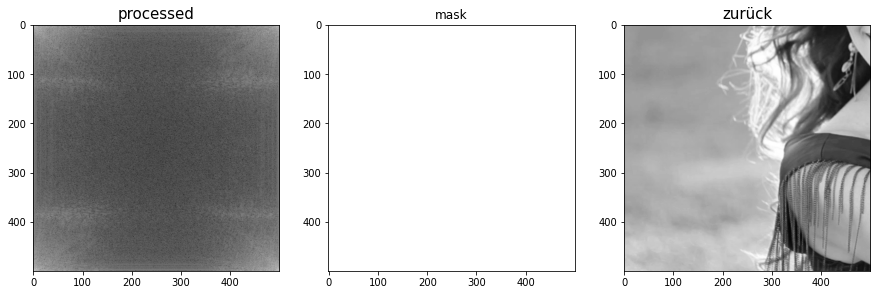

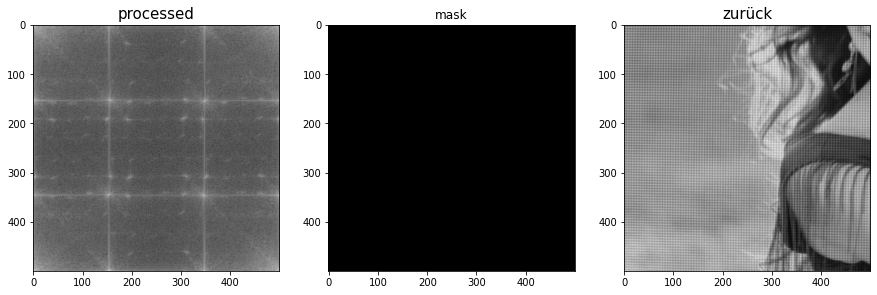

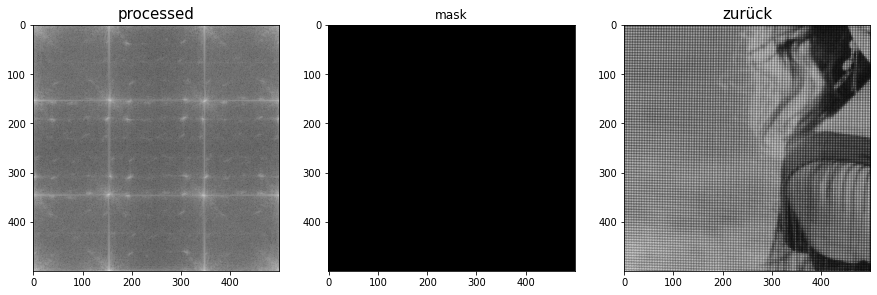

In [488]:


print("mask: 0")
mask = tf.complex(ones, zeros)
mask = tf.multiply(mask, 0)
print(f2pd(mask))
processed = soft_blending(img_clean_fourier, img_filmed_fourier, ones_t2c, mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(f2pd(processed), cmap='gray')
ax[0].set_title('processed', fontsize=f_size)
ax[1].imshow(f2pd(mask), cmap="gray")
ax[1].set_title("mask")
ax[2].imshow(abs(np.fft.ifft2(processed)), cmap='gray')
ax[2].set_title('zurück', fontsize=f_size)

print("mask: 0.5")
mask = tf.complex(ones, zeros)
mask = tf.multiply(mask, 0.5)
processed = soft_blending(img_clean_fourier, img_filmed_fourier, ones_t2c, mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(f2pd(processed), cmap='gray')
ax[0].set_title('processed', fontsize=f_size)
ax[1].imshow(f2pd(mask), cmap="gray")
ax[1].set_title("mask")
ax[2].imshow(abs(np.fft.ifft2(processed)), cmap='gray')
ax[2].set_title('zurück', fontsize=f_size)

print("mask: 1")
mask = tf.complex(ones, zeros)
mask = tf.multiply(mask, 1)
processed = soft_blending(img_clean_fourier, img_filmed_fourier, ones_t2c, mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(f2pd(processed), cmap='gray')
ax[0].set_title('processed', fontsize=f_size)
ax[1].imshow(f2pd(mask), cmap="gray")
ax[1].set_title("mask")
ax[2].imshow(abs(np.fft.ifft2(processed)), cmap='gray')
ax[2].set_title('zurück', fontsize=f_size)



## Model Test

In [489]:

input_1 = keras.Input(shape=(1), batch_size=1)
input_2 = keras.Input(shape=(1), batch_size=1)
input_3 = keras.Input(shape=(1), batch_size=1)

output_1 = input_1 + input_2 + input_3


model_1 = keras.Model(inputs=[input_1, input_2, input_3], outputs=[output_1])

execute_model_1 = tf.function(model_1)

execute_model_1([1,2,3])




<tf.Tensor: shape=(), dtype=float32, numpy=6.0>